In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("CyberBullying Comments Dataset.csv")

In [3]:
df

,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0
...,...,...
11095,"""Don't worry you little empty head over it ......",1
11096,"""Some of Ya'll are dumb as fuck.... These are ...",1
11097,"""Lana, you're so full of shit your eyes are br...",1
11098,"""You ain't lying let the @dbeeio61:disqus\xa0\...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      11100 non-null  object
 1   CB_Label  11100 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 173.6+ KB


Check if any reviews are blank strings.

In [5]:
df["Text"].str.isspace().sum()

0

<AxesSubplot:xlabel='CB_Label', ylabel='count'>

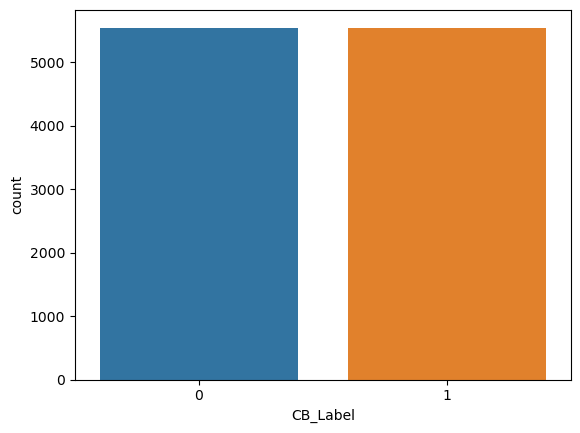

In [6]:
sns.countplot(data=df, x="CB_Label")

Get every word in the text starting with a lowercase letter

In [7]:
#df['Text'] = df['Text'].str.lower()

In [8]:
def remove_single_letters(text):
    return re.sub(r"\s+[a-zA-Z]\s+", " ", text)

In [9]:
df['Text'] = df['Text'].apply(remove_single_letters)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer(stop_words='english')

 top 15 words used for Cyberbullying Tweets

In [12]:
matrix1 = cv.fit_transform(df[df['CB_Label']==1]['Text'])
freqs1 = zip(cv.get_feature_names_out(), matrix1.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 15 words used for Cyberbullying Tweets.")
print(sorted(freqs1, key=lambda x: -x[1])[:15])

Top 15 words used for Cyberbullying Tweets.
[('like', 705), ('fuck', 679), ('xa0', 603), ('ass', 585), ('just', 558), ('hate', 495), ('fucking', 417), ('don', 416), ('damn', 410), ('bitch', 383), ('know', 364), ('people', 285), ('lol', 283), ('stupid', 272), ('idiot', 270)]


 top 15 words used for  NOT Cyberbullying Tweets

In [13]:
matrix0 = cv.fit_transform(df[df['CB_Label']==0]['Text'])
freqs0 = zip(cv.get_feature_names_out(), matrix0.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 15 words used for NOT Cyberbullying Tweets.")
print(sorted(freqs0, key=lambda x: -x[1])[:15])

Top 15 words used for NOT Cyberbullying Tweets.
[('hate', 918), ('damn', 832), ('ass', 509), ('sucks', 497), ('lol', 469), ('like', 446), ('just', 386), ('fuck', 297), ('fucking', 253), ('know', 246), ('good', 239), ('love', 237), ('don', 228), ('think', 218), ('haha', 184)]


Comparison of Top 15 Words Used for Cyberbullying and Not Cyberbullying Tweets

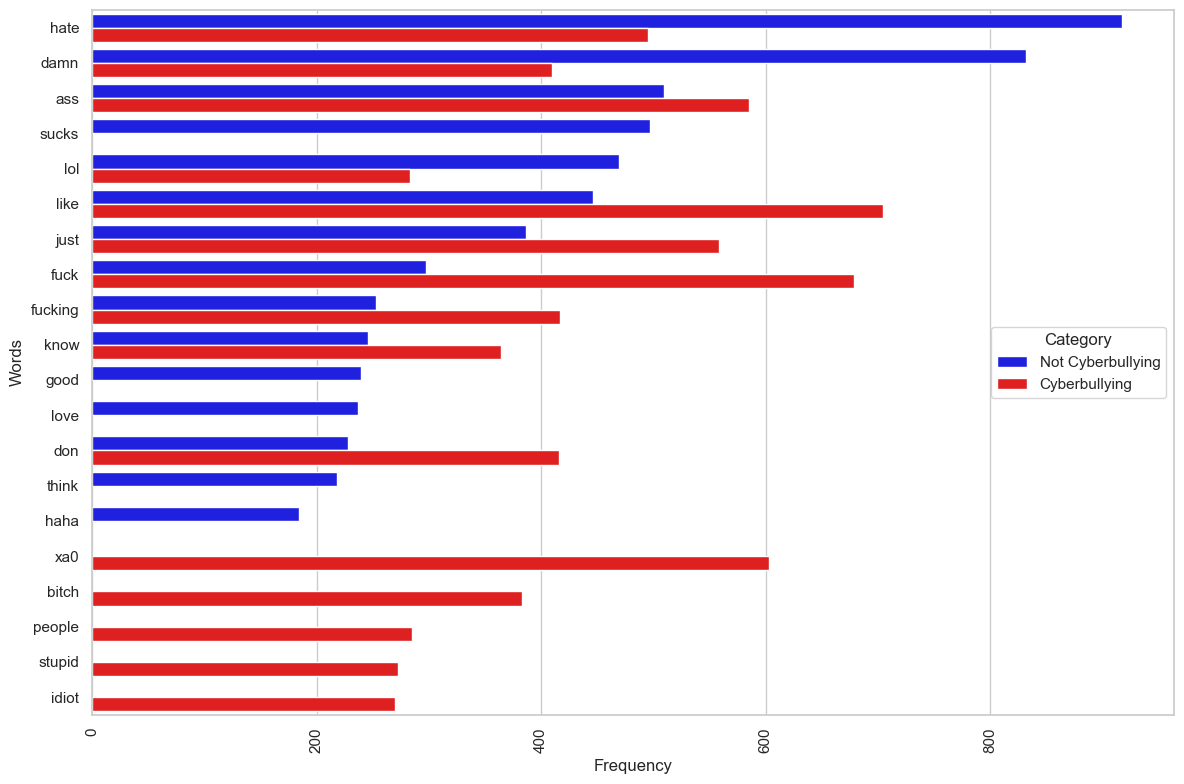

In [14]:
matrix0 = cv.fit_transform(df[df['CB_Label'] == 0]['Text'])
freqs0 = zip(cv.get_feature_names_out(), matrix0.sum(axis=0).tolist()[0])
sorted_freqs0 = sorted(freqs0, key=lambda x: -x[1])

matrix1 = cv.fit_transform(df[df['CB_Label'] == 1]['Text'])
freqs1 = zip(cv.get_feature_names_out(), matrix1.sum(axis=0).tolist()[0])
sorted_freqs1 = sorted(freqs1, key=lambda x: -x[1])

# Combine the top 15 words from both categories
combined_words = [word[0] for word in sorted_freqs0[:15]] + [word[0] for word in sorted_freqs1[:15]]
combined_frequencies = [word[1] for word in sorted_freqs0[:15]] + [word[1] for word in sorted_freqs1[:15]]
categories = (['Not Cyberbullying'] * 15) + (['Cyberbullying'] * 15)

# Create a DataFrame
data = pd.DataFrame({'Words': combined_words, 'Frequency': combined_frequencies, 'Category': categories})

# Create a countplot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set the style of the plot
sns.barplot(data=data, x='Frequency', y='Words', hue='Category', 
            palette={"Not Cyberbullying": "blue", "Cyberbullying": "red"})  # Create the countplot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

Top 10 common words

In [15]:
matrix0 = cv.fit_transform(df[df['CB_Label'] == 0]['Text'])
freqs0 = dict(zip(cv.get_feature_names_out(), matrix0.sum(axis=0).tolist()[0]))

matrix1 = cv.fit_transform(df[df['CB_Label'] == 1]['Text'])
freqs1 = dict(zip(cv.get_feature_names_out(), matrix1.sum(axis=0).tolist()[0]))

# Find common words and their frequencies
common_words = set(freqs0.keys()) & set(freqs1.keys())

# Create lists to store the common words and frequencies in both categories
common_words_list = []
freqs0_list = []
freqs1_list = []

for word in common_words:
    common_words_list.append(word)
    freqs0_list.append(freqs0[word])
    freqs1_list.append(freqs1[word])

# Create a DataFrame to display the data
common_words_df = pd.DataFrame({
    'Common Words': common_words_list,
    '0': freqs0_list,
    '1': freqs1_list
})

# Sort common words by their combined frequency (freqs0 + freqs1) in descending order
common_words_df = common_words_df.sort_values(by=['0', '1'], ascending=False)

# top 10 common words
common_words_df.head(10)

,Common Words,0,1
2829,hate,918,495
543,damn,832,410
3510,ass,509,585
2292,sucks,497,245
254,lol,469,283
4211,like,446,705
2641,just,386,558
3346,fuck,297,679
3657,fucking,253,417
3955,know,246,364


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [17]:
X = df["Text"]
y = df["CB_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [18]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [19]:
X_train  = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

### Testing several models

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [21]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
logR = LogisticRegression( max_iter=1000)

Setting parameters for each model

In [22]:
param_grid_rfc = {"n_estimators":[50, 72, 100, 128], "max_features":[2,3,4,5]}

In [23]:
param_grid_svc = {"C":[0.01, 0.1, 1, 10], "kernel":["linear", "rbf", "poly"], "degree":[2,3,4]}

In [24]:
param_grid_lr = {"penalty":["l2"], "C":[0.01,0.1,1,10]}

In [25]:
grid_rfc = GridSearchCV(rfc, param_grid_rfc)

grid_svc = GridSearchCV(svc, param_grid_svc)

grid_lr = GridSearchCV(logR, param_grid_lr)

In [26]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5],
                         'n_estimators': [50, 72, 100, 128]})

In [28]:
grid_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [29]:
grid_lr.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']})

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
def reporting_function(grid_model):
    print(f"Best Parameters: {grid_model.best_params_}\n")
    preds = grid_model.predict(X_test)
    print(f"Accuracy score: {accuracy_score(y_test, preds)}\n")
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

Accuracy score: 0.6725225225225225

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      1114
           1       0.67      0.67      0.67      1106

    accuracy                           0.67      2220
   macro avg       0.67      0.67      0.67      2220
weighted avg       0.67      0.67      0.67      2220



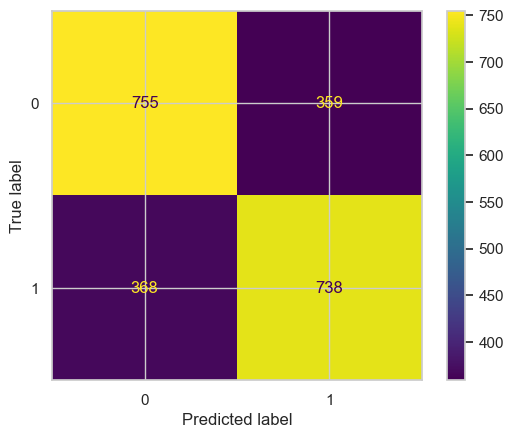

In [31]:
# Metrics for DecisionTreeClassifier
preds = dtc.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, preds)}\n")
print(classification_report(y_test, preds))
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)

Best Parameters: {'max_features': 5, 'n_estimators': 128}

Accuracy score: 0.7238738738738739

              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1114
           1       0.77      0.63      0.70      1106

    accuracy                           0.72      2220
   macro avg       0.73      0.72      0.72      2220
weighted avg       0.73      0.72      0.72      2220



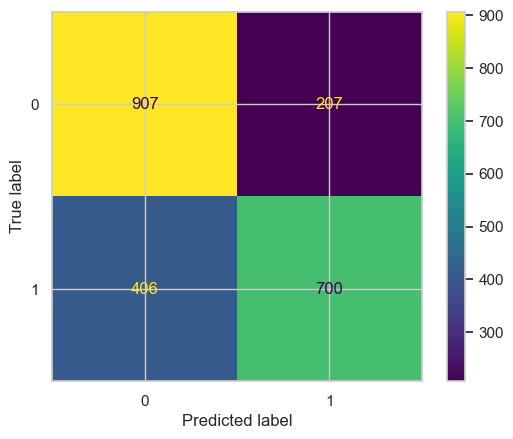

In [32]:
# Metrics for RandomForestClassifier
reporting_function(grid_rfc)

Best Parameters: {'C': 1, 'degree': 2, 'kernel': 'rbf'}

Accuracy score: 0.7333333333333333

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1114
           1       0.77      0.66      0.71      1106

    accuracy                           0.73      2220
   macro avg       0.74      0.73      0.73      2220
weighted avg       0.74      0.73      0.73      2220



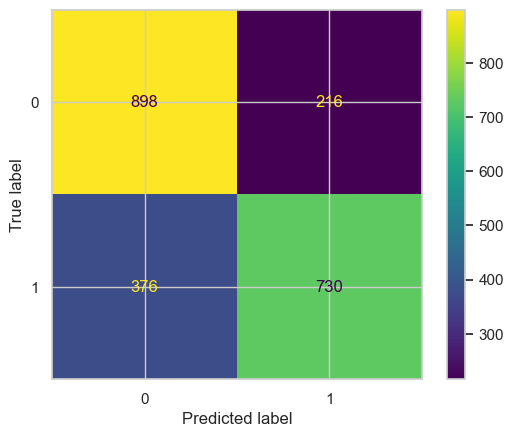

In [33]:
# Metrics for SVC
reporting_function(grid_svc)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}

Accuracy score: 0.7234234234234235

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1114
           1       0.76      0.66      0.70      1106

    accuracy                           0.72      2220
   macro avg       0.73      0.72      0.72      2220
weighted avg       0.73      0.72      0.72      2220



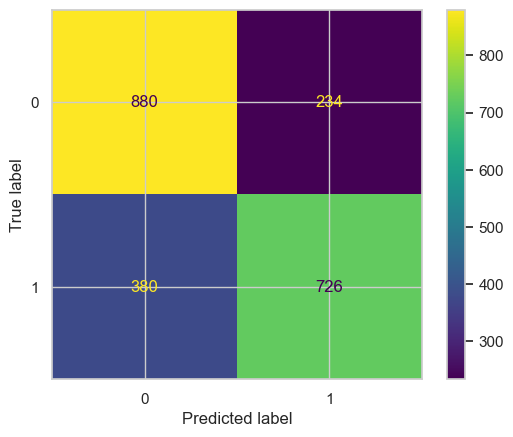

In [34]:
# Metrics for LogisticRegression
reporting_function(grid_lr)